![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 4: Assignements

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-11-07)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/DSF_WEEK_4_EXERCISES.ipynb)

# Exercise 1: dispersion plots [OBLIGATORY]

1. Load the `holy_grail.txt` dataset and create a dictionary of names and indexes like `{"NAME": [1, 2, 5, 10, ...]}` to store when does each NOUN appears among the 5 most frequent ones.
3. Visualize in the same graph the appearances of the top 5 characters to compare them.
4. **OPTIONAL**: Try the same exercise with [this file in the GitHub repo](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/pride_and_prejudice.txt)

In [1]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/ketevani/anaconda3/envs/bts36/lib/python3.6/site-packages/en_core_web_sm
-->
/Users/ketevani/anaconda3/envs/bts36/lib/python3.6/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [3]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [4]:
import spacy
n=spacy.load("en")
holy_grail=n(open('holy_grail.txt', 'r').read())

In [5]:
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

char_counter = Counter()

for token in holy_grail:
    if token.pos_ == 'NOUN' and token.text not in STOP_WORDS and token.text != '#':
        char_counter[token.text] += 1

In [6]:
char_counter.most_common(5)

[('boom', 42), ('witch', 37), ('music', 29), ('clop', 26), ('singing', 26)]

In [7]:
nouns, _=zip(*char_counter.most_common(5))
print(nouns, _)

('boom', 'witch', 'music', 'clop', 'singing') (42, 37, 29, 26, 26)


In [8]:
from collections import defaultdict

import matplotlib.pyplot as plt

In [9]:
indexes = defaultdict(list)

for token in holy_grail:
    if token.text in nouns:
        indexes[token.text].append(token.i)
        
print(indexes)

defaultdict(<class 'list'>, {'clop': [7, 8, 9, 20, 21, 22, 591, 592, 593, 1189, 1190, 1191, 2303, 2304, 2305, 4366, 4367, 4368, 4697, 4698, 4699, 4981, 4982, 4983, 6076, 6077, 6078, 13074, 13075, 13076, 14303, 14304, 14305, 14556, 14557, 14558, 15261, 15262, 15263], 'singing': [1136, 1931, 4500, 4730, 4949, 6158, 6372, 6426, 6842, 6859, 6877, 6903, 6923, 6948, 6967, 7133, 11036, 12777, 12803, 12822, 12841, 12861, 12902, 12922, 12956, 12984, 13012, 13039, 14057, 14143, 17652], 'music': [1241, 1251, 2178, 2181, 2194, 2197, 2215, 2218, 2239, 2244, 4978, 6307, 9247, 9250, 10127, 10303, 11032, 11666, 12752, 13071, 13108, 14553, 14561, 17590, 17593, 17602, 17657, 18120, 18123], 'witch': [2985, 2989, 2995, 2999, 3015, 3019, 3023, 3027, 3034, 3038, 3042, 3046, 3050, 3057, 3061, 3065, 3084, 3091, 3095, 3099, 3103, 3114, 3149, 3186, 3193, 3285, 3445, 3530, 3959, 3967, 3973, 3977, 4021, 4026, 4085, 4089, 4093], 'boom': [4702, 4703, 4751, 4791, 4946, 7117, 7129, 7139, 7145, 7190, 8701, 9645, 9660,

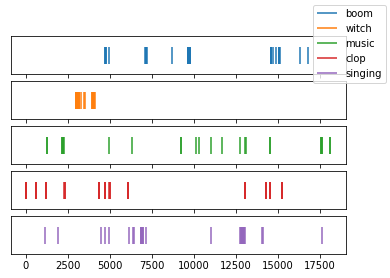

In [10]:
fig, axes = plt.subplots(5, sharex=True)

for ii, noun in enumerate(nouns):
    axes[ii].eventplot(indexes[noun], label=noun, color="C{}".format(ii))
    axes[ii].get_yaxis().set_visible(False)

fig.legend()

In [11]:
Pride_and_Prejudice=n(open('pride_and_prejudice.txt').read())

In [12]:
char_counter2 = Counter()

for token in Pride_and_Prejudice:
    if token.pos_ == 'NOUN' and token.text != '#':
        char_counter2[token.text] += 1

In [13]:
char_counter2.most_common(5)

[('sister', 218), ('time', 203), ('family', 151), ('man', 150), ('room', 150)]

In [14]:
nouns1, _=zip(*char_counter2.most_common(5))
print(nouns1, _)

('sister', 'time', 'family', 'man', 'room') (218, 203, 151, 150, 150)


In [15]:
indexes1 = defaultdict(list)

for token in Pride_and_Prejudice:
    if token.text in nouns1:
        indexes1[token.text].append(token.i)
        
print(indexes1)

defaultdict(<class 'list'>, {'man': [152, 180, 365, 476, 1758, 2950, 3068, 3292, 4455, 4526, 4577, 4629, 4965, 5408, 6494, 6845, 7711, 8463, 13013, 16639, 16655, 16918, 18675, 19652, 23884, 24008, 24662, 24870, 25020, 25132, 27065, 27647, 27982, 28164, 29675, 30118, 30474, 30552, 30993, 31222, 31308, 31786, 32526, 32562, 32628, 33590, 33860, 33866, 34607, 35804, 35874, 37512, 38168, 39131, 39547, 40681, 40786, 41621, 43036, 43512, 43841, 44364, 45956, 48264, 48482, 53459, 54006, 54217, 55035, 55061, 55453, 55481, 55978, 56074, 56409, 57335, 57543, 61280, 61410, 61480, 67952, 69618, 71995, 73268, 73530, 75098, 75692, 76705, 77819, 79223, 79335, 79432, 81597, 82489, 84147, 88808, 89185, 89930, 90056, 91844, 92621, 93598, 97208, 97365, 98770, 99582, 103967, 104372, 105834, 107938, 109032, 110691, 111782, 114938, 116182, 116245, 116560, 119939, 120032, 120111, 123160, 123377, 124845, 125424, 125903, 126399, 129574, 131987, 132751, 132772, 132982, 134717, 134889, 135879, 136636, 136696, 139

0
1
2
3
4


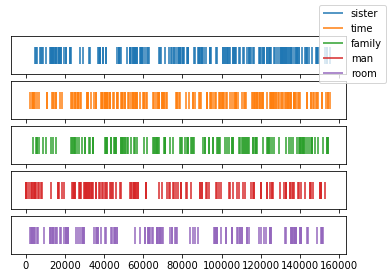

In [16]:
fig, axes = plt.subplots(5, sharex=True)

for index, noun in enumerate(nouns1):
    print(index)
    axes[index].eventplot(indexes1[noun], label=noun, color="C{}".format(index))
    axes[index].get_yaxis().set_visible(False)

fig.legend()

In [17]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


# Exercise 2: clustering words [OBLIGATORY]

Generate a scatter plot with the distance of the words in [this file](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/data/1-1000.txt). Load it correctly, beware not to load it as html! Use either PCA or t-SNE to cluster the words, play with different language models. For extra points, find the way to annotate the labels without clustering them, using arrows for instance. [Hint](https://stackoverflow.com/questions/40021676/pyplot-label-scatter-plot-with-coincident-points-overlapping-annotations).

In [18]:
import spacy
nlp = spacy.load("en")

In [19]:
import numpy as np
import spacy
from sklearn.decomposition import PCA


In [20]:
words=open('1-1000.txt', 'r').read()
word_tokens=nlp(words)

l = []
for token in word_tokens:
    if token.is_space:
        pass
    elif token.has_vector:
        l.append(token.text)
        print(token.text)
        
len(l)
print(l)

the
of
to
and
a
inhis
is
it
you
that
he
was
for
on
are
with
as
I
his
they
be
at
one
have
this
from
or
had
by
word
but
what
some
we
can
out
other
were
all
there
when
up
use
your
how
said
an
each
she
which
their
time
if
will
way
about
many
then
them
write
would
like
so
these
her
long
make
thing
see
him
two
has
look
more
day
could
go
come
did
number
sound
no
most
people
my
over
know
water
than
call
first
who
may
down
side
been
now
find
any
new
work
part
take
get
place
made
live
where
after
back
little
only
round
man
year
came
show
every
good
me
give
our
under
name
very
through
just
form
sentence
great
think
say
help
low
line
differ
turn
cause
much
mean
before
move
right
boy
old
too
same
tell
does
set
three
want
air
well
also
play
small
end
put
home
read
hand
port
large
spell
add
even
land
here
must
big
high
such
follow
act
why
ask
men
change
went
light
kind
off
need
house
picture
try
us
again
animal
point
mother
world
near
build
self
earth
father
head
stand
own
page
should
country
found
a

In [21]:
# Pass the tokens to a Doc
word_tokens = nlp(words)

# Create a vector of tokens with numpy
word_vectors = np.vstack([word.vector for word in word_tokens if word.has_vector and not word.is_space])

#Run a PCA of 2 components
pca = PCA(n_components=2)
word_vecs_transformed = pca.fit_transform(word_vectors)

In [22]:
print(word_vecs_transformed)

[[ 6.5219073  2.5837834]
 [ 4.0254745  8.654132 ]
 [ 3.1243997  8.128395 ]
 ...
 [ 2.034765   1.2215306]
 [-2.8433204 -3.4179296]
 [-1.585977   5.1775503]]


In [23]:
word_vecs_transformed = np.c_[l, word_vecs_transformed]

In [24]:
print(word_vecs_transformed)

[['the' '6.5219073' '2.5837834']
 ['of' '4.0254745' '8.654132']
 ['to' '3.1243997' '8.128395']
 ...
 ['teeth' '2.034765' '1.2215306']
 ['shell' '-2.8433204' '-3.4179296']
 ['neck' '-1.585977' '5.1775503']]


In [25]:
component_1 = [float(x) for x in word_vecs_transformed[:, 1]]
component_2 = [float(x) for x in word_vecs_transformed[:, 2]]
distance1 = [float(x)-float(y) for x, y in zip(word_vecs_transformed[:, 1], word_vecs_transformed[:, 2])]

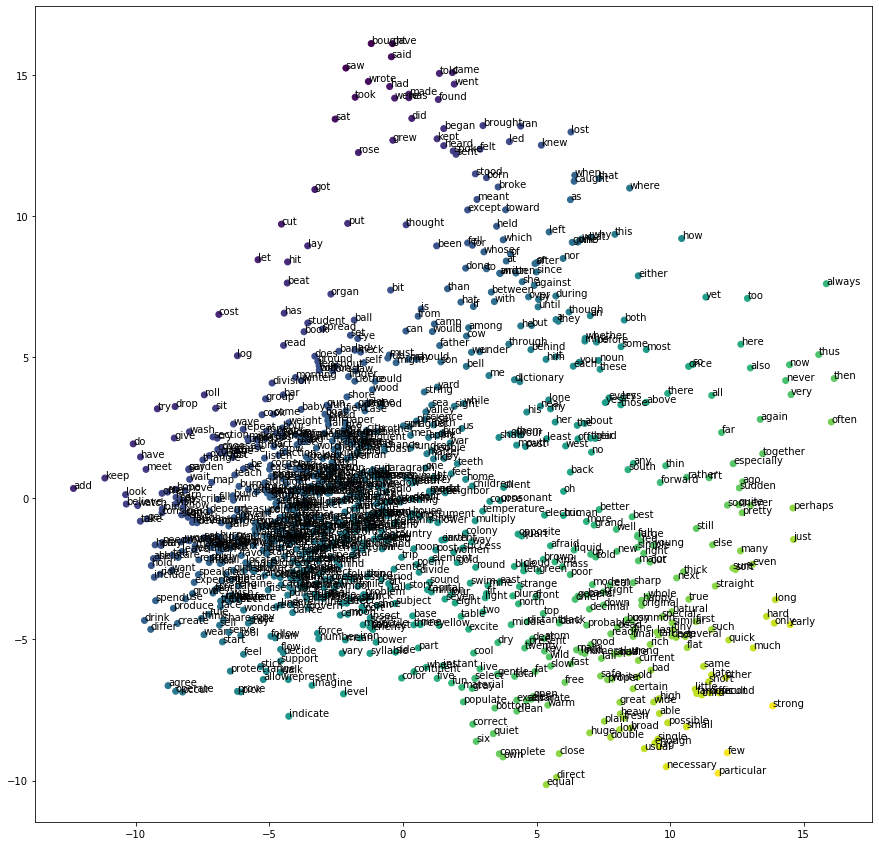

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(component_1, component_2, c=distance1)

for i, txt in enumerate(word_vecs_transformed[:, 0]):
    ax.annotate(txt, (component_1[i], component_2[i]))

In [28]:
import numpy as np
import spacy
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=1)
word_vecs_tsne = tsne.fit_transform(word_vectors)

In [30]:
print(word_vecs_tsne)

[[ 17.994694    87.889496  ]
 [-40.469746   -59.60663   ]
 [-48.942528   -60.749565  ]
 ...
 [-72.89238     -0.09691934]
 [ 48.28749    -28.388193  ]
 [-20.344158     3.4833374 ]]


In [31]:
word_vecs_tsne = np.c_[l, word_vecs_tsne]

In [32]:
print(word_vecs_tsne)

[['the' '17.994694' '87.889496']
 ['of' '-40.469746' '-59.60663']
 ['to' '-48.942528' '-60.749565']
 ...
 ['teeth' '-72.89238' '-0.09691934']
 ['shell' '48.28749' '-28.388193']
 ['neck' '-20.344158' '3.4833374']]


In [33]:
component_1_tsne = [float(x) for x in word_vecs_tsne[:, 1]]
component_2_tsne = [float(x) for x in word_vecs_tsne[:, 2]]
distance = [float(x)-float(y) for x, y in zip(word_vecs_tsne[:, 1], word_vecs_tsne[:, 2])]

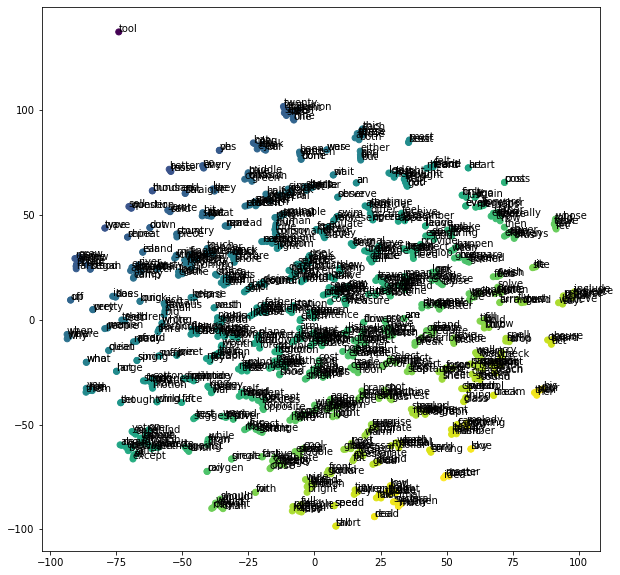

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(component_1_tsne, component_2_tsne, c=distance)

for i, txt in enumerate(word_vecs_tsne[:, 0]):
    ax.annotate(txt, (component_1_tsne[i], component_2_tsne[i]))

# Exercise 3: Jaccard Similairty and TF-IDF [OBLIGATORY]

Collect at least 7 sentences from political parties in your country. Try to do Jaccard Similarity and tf-idf on them so that you can see what are the most common words used between the parties. You neeed to translate the sentences to english, so that I can evaluate :)

Why Jaccard Similarity tends to fail? [Hint](https://medium.com/@adriensieg/text-similarities-da019229c894)

If you do not want to collect those sentences use the following:



Why Jaccard Similarity tends to fail?    
While sentences have pretty similar meaning, but words are different Jaccard Similarity tends to fail.

In [36]:
t0 = "German Ambassador: It would be good for those in charge in Tskhinvali and Moscow to learn the lessons of the Berlin Wall."
t1 = "Hearing of Supreme Court judicial candidate ongoing in almost empty hall."
t2 = "Beka Dochviri appointed as Government’s Parliamentary Secretary."
t3 = "Dutch PM: Georgia became an exemplary country for other countries in the region and that is why it is a key partner of the Netherlands and the European Union."
t4 = "PM: The Netherlands is a great supporter of our country, we highly appreciate this support."
t5 = "Gazelle Fund LP invests in NUTSGE, a leading premium Hazelnut processing plant in Georgia."
t6 = "Greek police detain Georgian truck driver, who planned to take 41 migrants to Europe."

In [37]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import numpy as np
import pandas as pd

In [38]:
nlp = spacy.load("en")

In [39]:
def lemmatize(doc):
    return [token.lemma_ for token in doc if not
           (token.is_punct or token.is_space or token.lower_ in STOP_WORDS)]

In [40]:
lemmatize(nlp(t0))

['german',
 'Ambassador',
 'good',
 'charge',
 'Tskhinvali',
 'Moscow',
 'learn',
 'lesson',
 'Berlin',
 'Wall']

In [41]:
def jaccard(doc1, doc2):
    s1 = set(lemmatize(doc1))
    s2 = set(lemmatize(doc2))
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [42]:
jaccard(nlp(t0), nlp(t1))

0.0

In [43]:
data = np.zeros((7, 7))
docs = [nlp(text) for text in (t0, t1, t2, t3, t4, t5, t6)]
for ii, doc_a in enumerate(docs):
    for jj, doc_b in enumerate(docs):
        data[ii, jj] = jaccard(doc_a, doc_b)

pd.DataFrame(data)

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.000000,0.0000,0.000000,0.0
1,0.0,1.0,0.0,0.000000,0.0000,0.000000,0.0
2,0.0,0.0,1.0,0.000000,0.0000,0.000000,0.0
3,0.0,0.0,0.0,1.000000,0.1875,0.047619,0.0
4,0.0,0.0,0.0,0.187500,1.0000,0.000000,0.0
5,0.0,0.0,0.0,0.047619,0.0000,1.000000,0.0
6,0.0,0.0,0.0,0.000000,0.0000,0.000000,1.0


In [44]:
print(docs)

[German Ambassador: It would be good for those in charge in Tskhinvali and Moscow to learn the lessons of the Berlin Wall., Hearing of Supreme Court judicial candidate ongoing in almost empty hall., Beka Dochviri appointed as Government’s Parliamentary Secretary., Dutch PM: Georgia became an exemplary country for other countries in the region and that is why it is a key partner of the Netherlands and the European Union., PM: The Netherlands is a great supporter of our country, we highly appreciate this support., Gazelle Fund LP invests in NUTSGE, a leading premium Hazelnut processing plant in Georgia., Greek police detain Georgian truck driver, who planned to take 41 migrants to Europe.]


In [45]:
from collections import Counter

In [46]:
def tf(word, doc):
    counts = Counter(lemmatize(doc))
    return counts[word]

In [47]:
tf('German', nlp(t0))

0

In [48]:
def idf(word, docs):
    count = 0
    for doc in docs:
        if word in lemmatize(doc):
            count += 1
    return count / len(docs)

In [49]:
idf('Georgia', docs)

0.2857142857142857

In [50]:
def tf_idf(word, doc, docs):
    return tf(word, doc) * idf(word, docs)

In [51]:
tf_idf("country", nlp(t1), docs)

0.0

In [52]:
def all_lemmas(docs):
    lemmas = set()
    for doc in docs:
        lemmas.update(lemmatize(doc))
    return lemmas

In [53]:
print(all_lemmas(docs))

{'Parliamentary', 'supporter', 'driver', 'highly', 'ongoe', 'Government', 'hear', 'LP', 'german', 'hall', 'learn', 'Tskhinvali', 'judicial', 'processing', '41', 'good', 'Fund', 'Dochviri', 'plant', 'Court', 'invest', 'Hazelnut', 'Wall', 'partner', 'Moscow', 'lesson', 'appoint', 'Gazelle', 'Berlin', 'pm', 'greek', 'Ambassador', 'Supreme', 'premium', 'charge', 'Georgia', 'region', 'Netherlands', 'European', 'Union', 'truck', 'Secretary', 'dutch', 'detain', 'exemplary', 'Europe', 'support', 'leading', 'country', 'police', 'candidate', 'georgian', 'great', 'appreciate', 'key', 'plan', 'Beka', 'NUTSGE', 'migrant'}


In [54]:
def tf_idf_doc(doc, docs):
    lemmas = all_lemmas(docs)
    res = {}
    for lemma in lemmas:
        res[lemma] = tf_idf(lemma, doc, docs)
    return res

In [55]:
print(tf_idf_doc(docs[0], docs))

{'Parliamentary': 0.0, 'supporter': 0.0, 'driver': 0.0, 'highly': 0.0, 'ongoe': 0.0, 'Government': 0.0, 'hear': 0.0, 'LP': 0.0, 'german': 0.14285714285714285, 'hall': 0.0, 'learn': 0.14285714285714285, 'Tskhinvali': 0.14285714285714285, 'judicial': 0.0, 'processing': 0.0, '41': 0.0, 'good': 0.14285714285714285, 'Fund': 0.0, 'Dochviri': 0.0, 'plant': 0.0, 'Court': 0.0, 'invest': 0.0, 'Hazelnut': 0.0, 'Wall': 0.14285714285714285, 'partner': 0.0, 'Moscow': 0.14285714285714285, 'lesson': 0.14285714285714285, 'appoint': 0.0, 'Gazelle': 0.0, 'Berlin': 0.14285714285714285, 'pm': 0.0, 'greek': 0.0, 'Ambassador': 0.14285714285714285, 'Supreme': 0.0, 'premium': 0.0, 'charge': 0.14285714285714285, 'Georgia': 0.0, 'region': 0.0, 'Netherlands': 0.0, 'European': 0.0, 'Union': 0.0, 'truck': 0.0, 'Secretary': 0.0, 'dutch': 0.0, 'detain': 0.0, 'exemplary': 0.0, 'Europe': 0.0, 'support': 0.0, 'leading': 0.0, 'country': 0.0, 'police': 0.0, 'candidate': 0.0, 'georgian': 0.0, 'great': 0.0, 'appreciate': 0.

In [56]:
def tf_idf_scores(docs):
    lemmas = all_lemmas(docs)
    rows = []
    for doc in docs:
        rows.append(tf_idf_doc(doc, docs))

    return pd.DataFrame(rows)

In [57]:
tb = tf_idf_scores(docs)
tb

,Parliamentary,supporter,driver,highly,ongoe,Government,hear,LP,german,hall,...,police,candidate,georgian,great,appreciate,key,plan,Beka,NUTSGE,migrant
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.142857,...,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000
6,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.142857


In [58]:
tb.max().max()

0.5714285714285714

In [59]:
tb / tb.max().max()

,Parliamentary,supporter,driver,highly,ongoe,Government,hear,LP,german,hall,...,police,candidate,georgian,great,appreciate,key,plan,Beka,NUTSGE,migrant
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.25,...,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.25,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00
4,0.00,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00
6,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.25


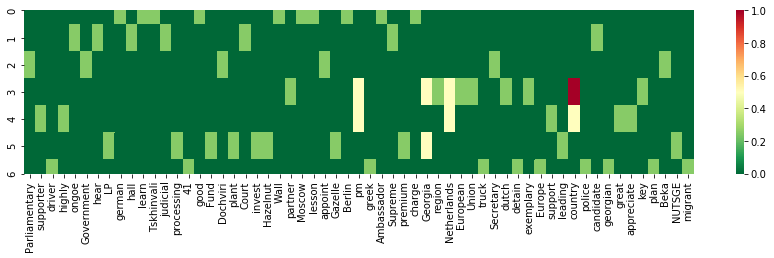

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 3))
sns.heatmap(tb / tb.max().max(), cmap="RdYlGn_r", annot=False);